In [ ]:
inputdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentation/2405_D18-M3-S0-L8_14/"
segmentationdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2405_D18-M3-S0-L8_14/"
OUTPUT_DIR = "/group/jug/ashesh/naturemethods/segmentation/one_analyst/Analysis_2405_D18-M3-S0-L8_14/"

In [ ]:
from disentangle.core.tiff_reader import load_tiff
import os

ch_idx = 1  # which channel are we interested in doing segmentation.
gt = load_tiff(os.path.join(inputdir, "GT.tif"))
pred = load_tiff(os.path.join(inputdir, "pred_disentangle_2405_D18-M3-S0-L8_14_1.tif"))
pred.shape, gt.shape

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


((5, 2, 4096, 4096), (5, 2, 4096, 4096))

In [ ]:
input = (gt[:, 0] + gt[:, 1]) / 2
gt_ch = gt[:, ch_idx]
pred_ch = pred[:, ch_idx]
raw_dict = {"input": input, "pred": pred_ch, "GT": gt_ch}


In [ ]:
seg_input = load_tiff(os.path.join(segmentationdir, "Segmentation3_Input.tif"))
seg_pred = load_tiff(os.path.join(segmentationdir, "Segmentation3_Prediction.tif"))
seg_GT = load_tiff(os.path.join(segmentationdir, "segmentation_GT.tif"))


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

In [5]:
seg_input.shape

(4096, 4096)

In [ ]:
import numpy as np


def dice_coefficient(x, y):
    assert set(np.unique(x)) == set([0, 1])
    assert set(np.unique(y)) == set([0, 1])
    intersection = np.sum(x[y == 1])
    union = np.sum(x) + np.sum(y)
    return 2 * intersection / union


def add_text(ax, text, img_shape, place="TOP_LEFT"):
    """
    Adding text on image
    """
    assert place in ["TOP_LEFT", "BOTTOM_RIGHT"]
    if place == "TOP_LEFT":
        ax.text(70, 130, text, bbox=dict(facecolor="white", alpha=0.9))
    elif place == "BOTTOM_RIGHT":
        s0 = img_shape[1]
        s1 = img_shape[0]
        ax.text(s0 - s0 * 150 / 500, s1 - s1 * 35 / 500, text, bbox=dict(facecolor="white", alpha=0.9))


/group/jug/ashesh/naturemethods/segmentation/one_analyst/Analysis_2405_D18-M3-S0-L8_14/segmentation_1analyst_2405_D18-M3-S0-L8_14.png


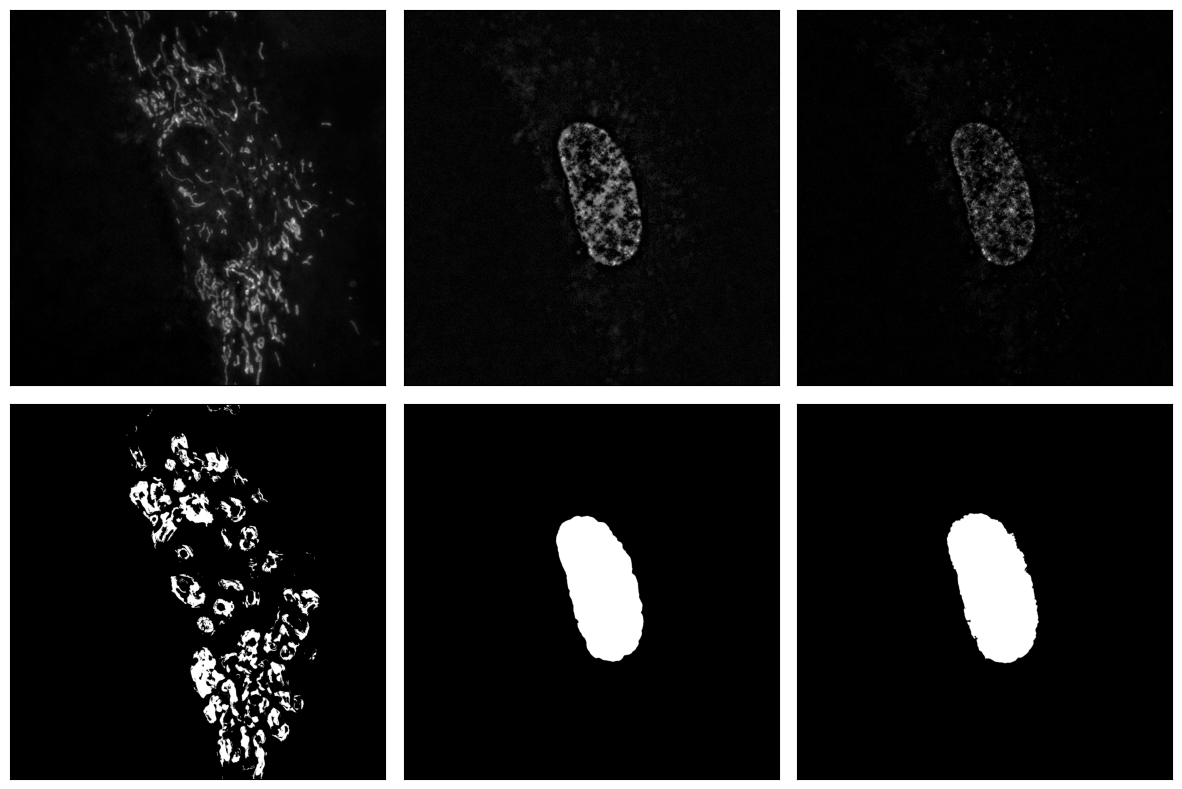

In [ ]:
from disentangle.analysis.plot_utils import clean_ax
import matplotlib.pyplot as plt

img_idx = 0
img_size = 5
s = 1000
e = 3000
save_to_file = True
_, ax = plt.subplots(figsize=(3 * img_size, 2 * img_size), ncols=3, nrows=2)
ax[0, 0].imshow(raw_dict["input"][img_idx][s:e, s:e], cmap="gray")
ax[0, 1].imshow(raw_dict["pred"][img_idx][s:e, s:e], cmap="gray")
ax[0, 2].imshow(raw_dict["GT"][img_idx][s:e, s:e], cmap="gray")
ax[1, 0].imshow(seg_input[s:e, s:e], cmap="gray")
ax[1, 1].imshow(seg_pred[s:e, s:e], cmap="gray")
ax[1, 2].imshow(seg_GT[s:e, s:e], cmap="gray")

dice_input = dice_coefficient(seg_GT.flatten() > 0, seg_input.flatten() > 0)
dice_pred = dice_coefficient(seg_GT.flatten() > 0, seg_pred.flatten() > 0)
# add_text(ax[1,0], f'DICE: {dice_input:.2f}', seg_input.shape, place='TOP_LEFT')
# add_text(ax[1,1], f'DICE: {dice_pred:.2f}', seg_input.shape, place='TOP_LEFT')


clean_ax(ax)
# remove the space between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
if save_to_file:
    model_token = os.path.basename(inputdir.strip("/"))
    fname = f"segmentation_1analyst_{model_token}.png"
    fpath = os.path.join(OUTPUT_DIR, fname)
    print(fpath)
    plt.savefig(fpath, dpi=100, bbox_inches="tight")


In [ ]:
from disentangle.core.tiff_reader import load_tiff
# gt = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2402_D21-M3-S0-L8_6/seg/gt/GT-1.tif')
# pred = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2402_D21-M3-S0-L8_6/seg/pred/pred_ch1.tif')
# inp = load_tiff('/facility/imganfacusers/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2402_D21-M3-S0-L8_6/seg/input/input.tif')

gt = load_tiff(
    "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2405_D18-M3-S0-L8_13/seg/gt/GT_1.tif"
)[None]
pred = load_tiff(
    "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2405_D18-M3-S0-L8_13/seg/split/split_1.tif"
)[None]
inp = load_tiff(
    "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2405_D18-M3-S0-L8_13/seg/input/input_1.tif"
)[None]
print(gt.shape, pred.shape, inp.shape)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


FileNotFoundError: [Errno 2] No such file or directory: '/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Combined_labels/2405_D18-M3-S0-L8_13/seg/split/split_1.tif'

TypeError: Invalid shape (2, 4096, 4096) for image data

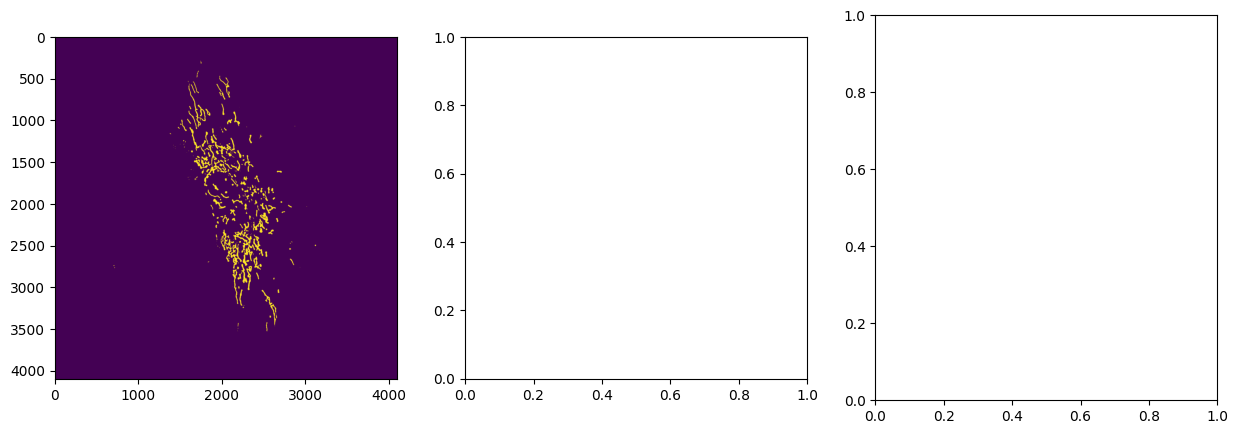

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(15, 5), ncols=3)
img_idx = 0
ax[0].imshow(gt[img_idx])
ax[1].imshow(pred[img_idx])
ax[2].imshow(inp[img_idx])